In [2]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import imageio
inf = 10 ** 16

In [28]:
def dist(x, y):
    a = 1
    b = 3
    return ((((x[0] - y[0])) ** 2 +
            ((x[1] - y[1])) ** 2) * a +
            (((int(x[2][0]) - int(y[2][0]))) ** 2 +
            ((int(x[2][1]) - int(y[2][1]))) ** 2 +
            ((int(x[2][2]) - int(y[2][2]))) ** 2) * b)

In [4]:
def new_cluster(cluster_points, img):
    max = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            min = inf
            point = [x,y,img[x][y]]
            for k in cluster_points:
                r = dist(k, point)
                if (r < min):
                    min = r
            if min > max:
                max = min
                farthest_point = point
    cluster_points.append(farthest_point)   

In [5]:
def point_cluster(cluster_points, point):
    min = inf
    cluster = -1
    for k in range(len(cluster_points)):
        r = dist(cluster_points[k], point)
        if r < min:
            cluster = k
            min = r
    return cluster

In [6]:
def segmentation(img, clusters):
    image = np.copy(img)
    first_x = np.random.randint(0, image.shape[0])
    first_y = np.random.randint(0, image.shape[1])
    cluster_points = [[first_x, first_y, image[first_x, first_y]]]
    for i in range(1, clusters):
        new_cluster(cluster_points, image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            cluster = point_cluster(cluster_points, [x,y,img[x,y]])
            image[x][y] = cluster_points[cluster][2]
    return image

Loaded image of shape 160, 240


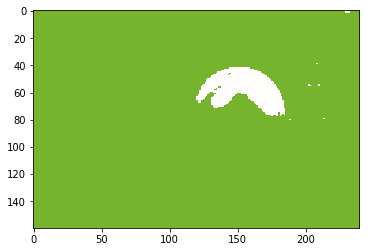

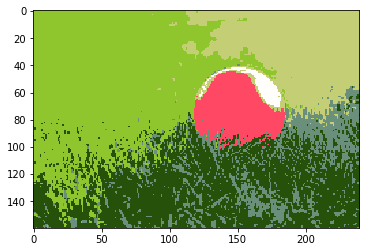

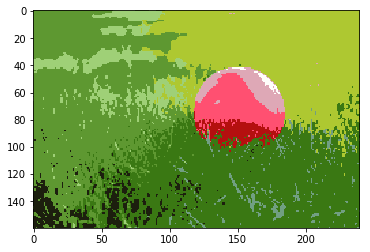

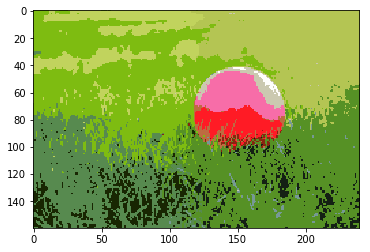

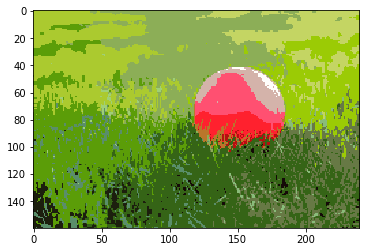

In [10]:
def main():
    IMG= 'ball.jpg'
    image = imageio.imread(IMG)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in range(2, 20, 4):
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()
    

Loaded image of shape 274, 300


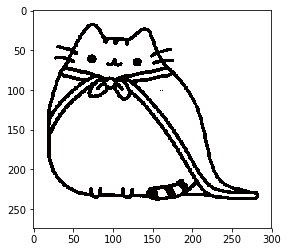

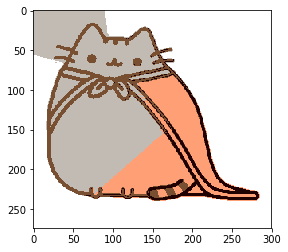

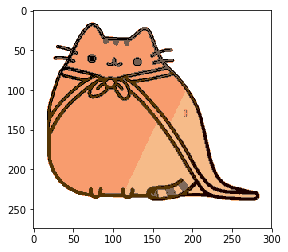

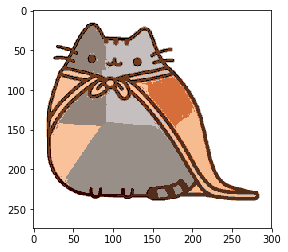

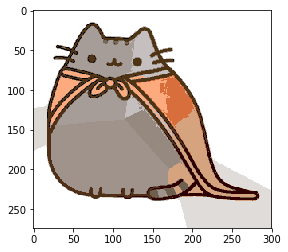

In [11]:
def main():
    IMG= 'cat.png'
    image = imageio.imread(IMG)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in range(2, 20, 4):
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()

Loaded image of shape 317, 500


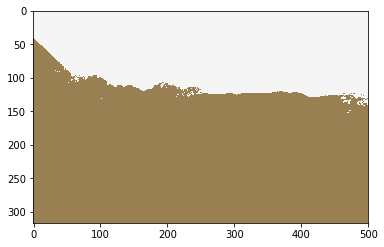

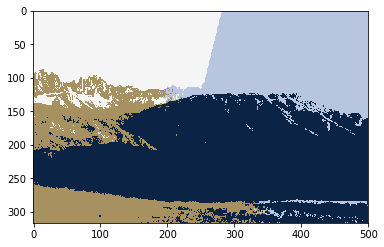

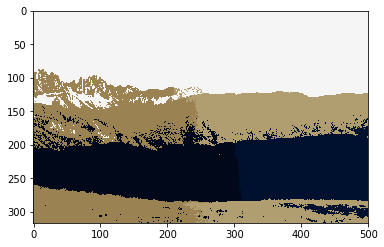

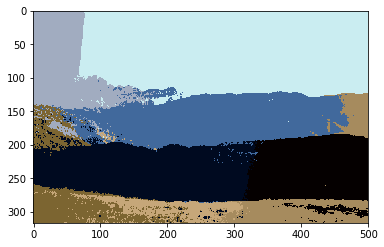

In [12]:
def main():
    IMG= 'landscape.jpg'
    image = imageio.imread(IMG)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in range(2, 10, 2):
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()

Loaded image of shape 367, 550


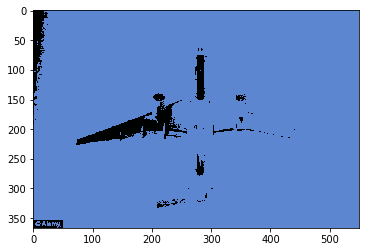

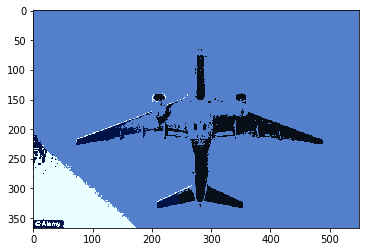

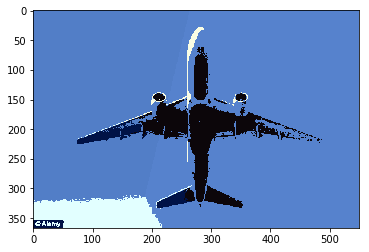

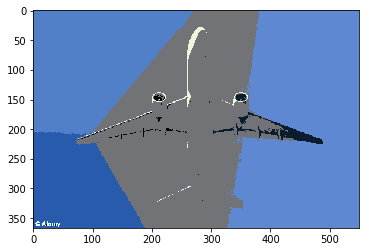

In [13]:
def main():
    IMG= 'plane.jpg'
    image = imageio.imread(IMG)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in range(2, 10, 2):
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()

Loaded image of shape 1080, 1920


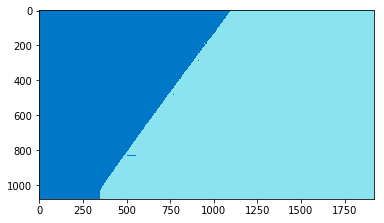

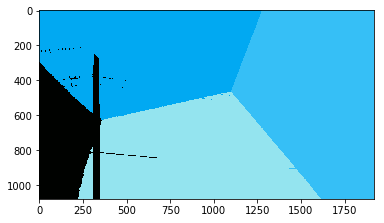

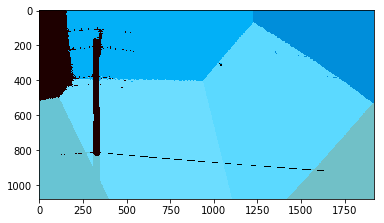

In [14]:
def main():
    IMG= 'sky.jpg'
    image = imageio.imread(IMG)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in [2,4,8]:
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()

Loaded image of shape 512, 400


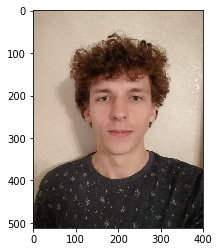

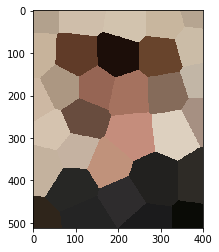

In [22]:
def main():
    from skimage import transform
    IMG= 'Ilgovskiy.jpg'
    image = imageio.imread(IMG)
    image = transform.resize(image, (512, 400, 3))
    plt.figure()
    plt.imshow(np.array(image))
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    for i in [32]:
        segm_img = segmentation(image, i)
        plt.figure()
        plt.imshow(np.array(segm_img))
 
if __name__ == '__main__':
    main()